# 911 Calls Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

** Read in the csv file as a dataframe called df **

In [4]:
df=pd.read_csv('911.csv')

** Check the info() of the df **

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB
None


** Check the head of df **

In [6]:
print(df.head())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & 

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [18]:

group_zipcode=df.groupby('zip').size() # or df['zip'].value_counts()
top_5_zipcodes=group_zipcode.sort_values(ascending=False).head(5)
print(top_5_zipcodes)


zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
dtype: int64


** What are the top 5 townships (twp) for 911 calls? **

In [27]:
group_townships=df['twp'].value_counts()
top_5_townships=group_townships.head(5)
print(top_5_townships)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64


** Take a look at the 'title' column, how many unique title codes are there? **

In [21]:
unique_title_num=df['title'].nunique()
print(unique_title_num)

110


## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [28]:
df['Reason']=df['title'].apply(lambda x:x.split(':')[0])
print(df[['title','Reason']].head())

                     title Reason
0   EMS: BACK PAINS/INJURY    EMS
1  EMS: DIABETIC EMERGENCY    EMS
2      Fire: GAS-ODOR/LEAK   Fire
3   EMS: CARDIAC EMERGENCY    EMS
4           EMS: DIZZINESS    EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [32]:
most_common_reason=df['Reason'].value_counts().idxmax()
print(most_common_reason)

EMS


** Now use seaborn to create a countplot of 911 calls by Reason. **

C:\Users\suras\AppData\Local\Temp\ipykernel_9168\3273475746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Reason',palette='viridis')


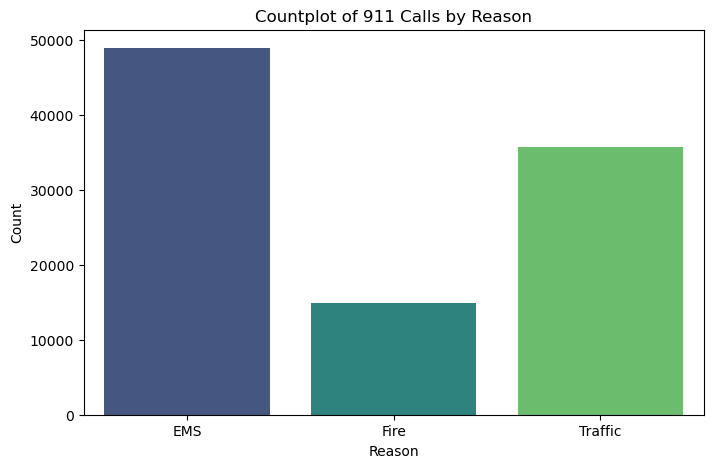

In [34]:

plt.figure(figsize=(8,5))

sns.countplot(data=df,x='Reason',palette='viridis')

plt.title('Countplot of 911 Calls by Reason')

plt.xlabel('Reason')

plt.ylabel('Count')

plt.show()

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [43]:
timeStamp_dt = df['timeStamp'].dtype
print(timeStamp_dt)

object


** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [47]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
print(df['timeStamp'].dtype)

datetime64[ns]


** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [60]:
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)
df['Month']=df['timeStamp'].apply(lambda x:x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)


print(df[['timeStamp','Hour','Month','Day of Week']].head(3))
print(df[['timeStamp','Hour','Month','Day of Week']].tail(3))



            timeStamp  Hour  Month  Day of Week
0 2015-12-10 17:40:00    17     12            3
1 2015-12-10 17:40:00    17     12            3
2 2015-12-10 17:40:00    17     12            3
                timeStamp  Hour  Month  Day of Week
99489 2016-08-24 11:12:00    11      8            2
99490 2016-08-24 11:17:01    11      8            2
99491 2016-08-24 11:17:02    11      8            2


** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [61]:
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['Day of Week'] = df['Day of Week'].map(dmap)
print(df[['Day of Week']].head())
print(df[['Day of Week']].tail())



  Day of Week
0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
      Day of Week
99487         Wed
99488         Wed
99489         Wed
99490         Wed
99491         Wed


** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

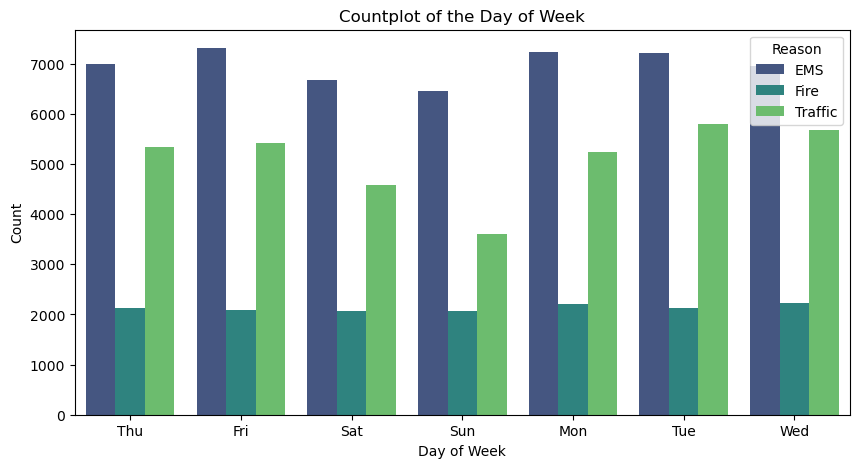

In [76]:

plt.figure(figsize=(10,5))

sns.countplot(data=df,x='Day of Week',palette='viridis',hue='Reason')

plt.title('Countplot of the Day of Week')

plt.xlabel('Day of Week')

plt.ylabel('Count')

plt.legend(title='Reason',loc='best')

plt.show()

**Now do the same for Month:**

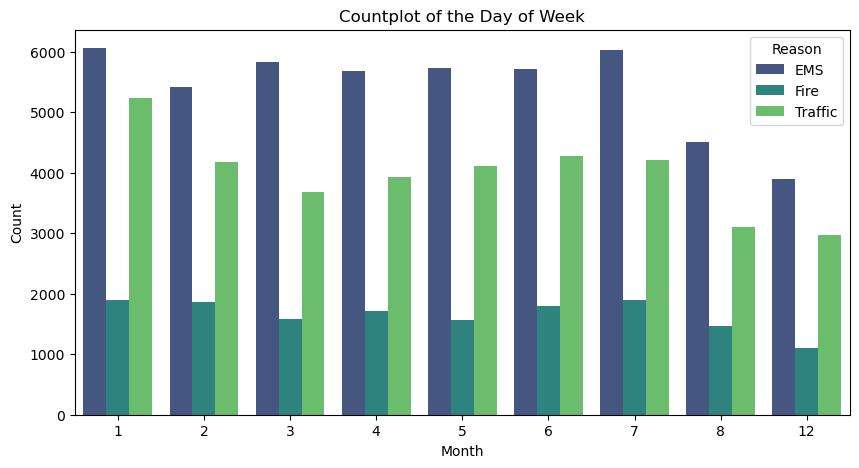

In [77]:

plt.figure(figsize=(10,5))

sns.countplot(data=df,x='Month',palette='viridis',hue='Reason')

plt.title('Countplot of the Day of Week')

plt.xlabel('Month')

plt.ylabel('Count')

plt.legend(title='Reason',loc='best')

plt.show()

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [79]:
byMonth=df.groupby('Month').count().head()
print(byMonth)

         lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       Reason   Hour  Day of Week  
Month                              
1       13205  13205        13205  
2       11467  11467        11467  
3       11101  11101        11101  
4       11326  11326        11326  
5       11423  11423        11423  


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

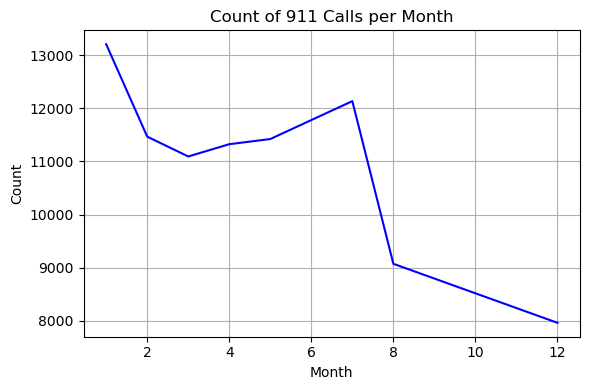

In [90]:
byMonth=df.groupby('Month').count()

plt.figure(figsize=(6,4))
plt.plot(byMonth.index,byMonth['twp'],linestyle='-',color='b')

plt.title('Count of 911 Calls per Month')

plt.xlabel('Month')

plt.ylabel('Count')

plt.grid(True)
plt.tight_layout()
plt.show()


** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

<Figure size 800x500 with 0 Axes>

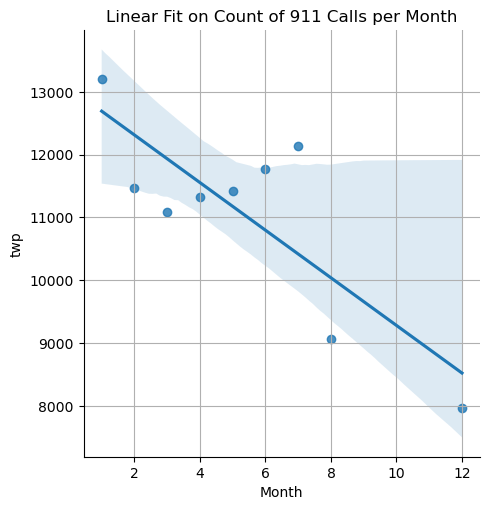

In [95]:
byMonth_reset = byMonth.reset_index() 

plt.figure(figsize=(8,5))
sns.lmplot(data=byMonth_reset,x='Month',y='twp')

plt.title('Linear Fit on Count of 911 Calls per Month')

plt.xlabel('Month')

plt.ylabel('twp')

plt.grid(True)
plt.show()

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. **

In [98]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df['Date']=df['timeStamp'].apply(lambda x:x.date())
print(df.head())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  Hour  Month Day of We

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

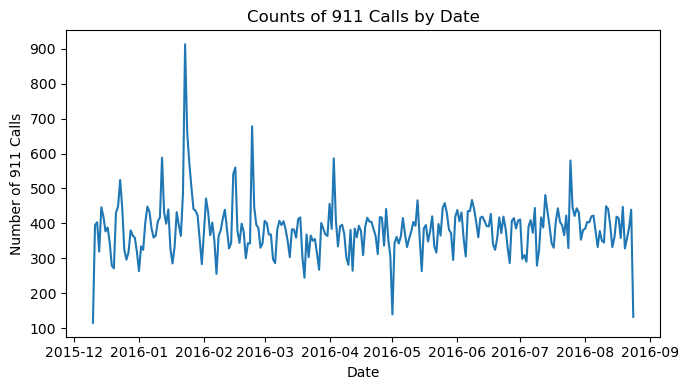

In [105]:
calls_by_date=df.groupby('Date').count()
# Plot the counts of 911 calls over time
plt.figure(figsize=(7,4))
calls_by_date['twp'].plot()

# Add title and labels
plt.title('Counts of 911 Calls by Date')
plt.xlabel('Date')
plt.ylabel('Number of 911 Calls')

# Show the plot
plt.tight_layout()
plt.show()


** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

['EMS' 'Fire' 'Traffic']


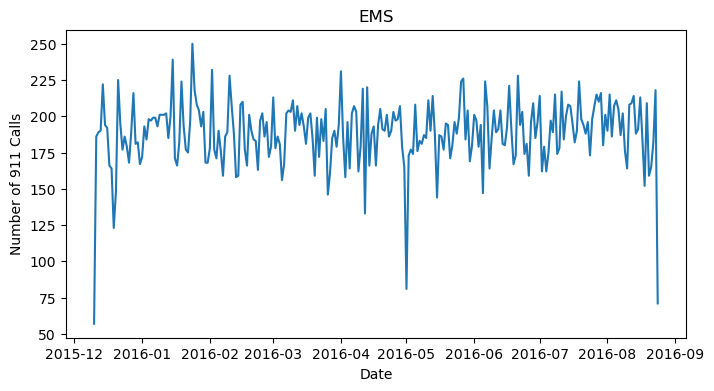

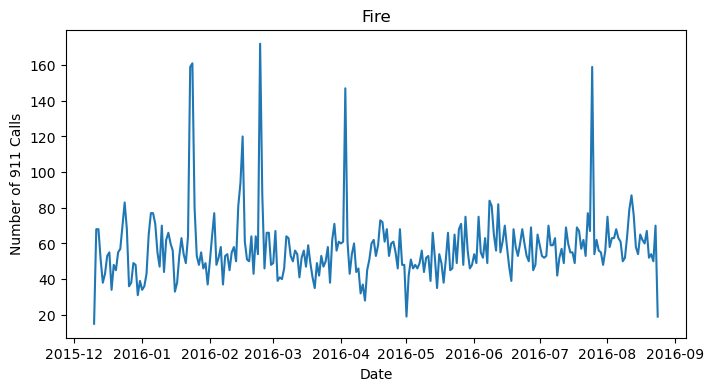

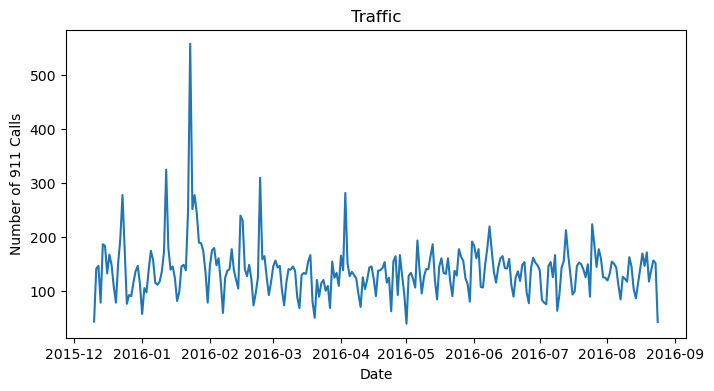

In [108]:
Reasons=df['Reason'].unique()
print(Reasons) # list of reasons 

for reason in Reasons:
    reason_df=df[df['Reason']==reason]

    calls_by_date=reason_df.groupby('Date').count()
    plt.figure(figsize=(8,4))
    calls_by_date['twp'].plot()
    plt.title(reason)
    plt.xlabel('Date')
    plt.ylabel('Number of 911 Calls')
    plt.show()


____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [120]:
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)
df['Day of Week']=df['timeStamp'].apply(lambda x:x.day_name())

grouped=df.groupby(['Day of Week','Hour']).count()['twp']

heatmap_data=grouped.unstack()
print(heatmap_data)



Hour          0    1    2    3    4    5    6    7    8    9   ...   14   15  \
Day of Week                                                    ...             
Friday       275  235  191  175  201  194  372  598  742  752  ...  931  980   
Monday       282  220  201  194  204  267  397  653  819  785  ...  869  913   
Saturday     373  301  263  260  224  231  257  391  459  640  ...  789  796   
Sunday       383  304  285  268  242  240  300  401  483  620  ...  684  691   
Thursday     278  202  233  159  182  203  362  570  777  828  ...  876  969   
Tuesday      269  240  186  170  209  239  414  655  889  878  ...  942  938   
Wednesday    249  216  189  207  156  254  409  701  875  808  ...  903  867   

Hour           16    17   18   19   20   21   22   23  
Day of Week                                            
Friday       1039   980  819  696  667  558  514  474  
Monday        988   997  885  746  612  496  471  325  
Saturday      848   757  778  696  627  571  505  467  

** Now create a HeatMap using this new DataFrame. **

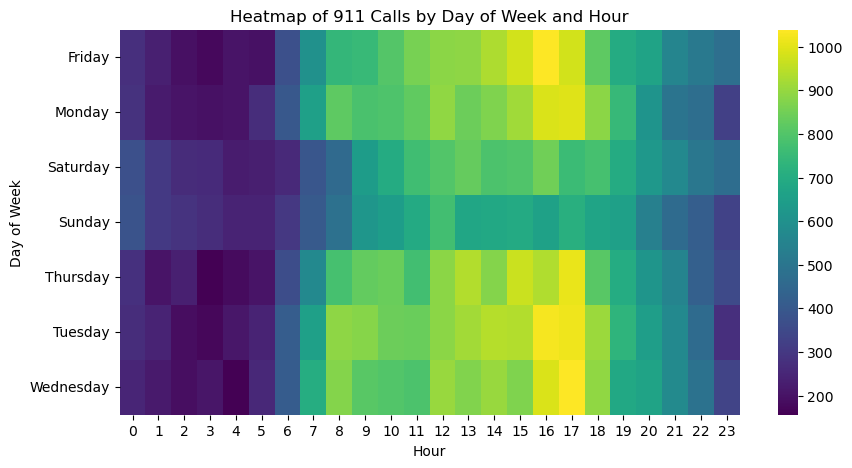

In [115]:
plt.figure(figsize=(10,5))
sns.heatmap(heatmap_data, cmap='viridis', fmt='d')
plt.title('Heatmap of 911 Calls by Day of Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')

plt.show()

** Now create a clustermap using this DataFrame. **

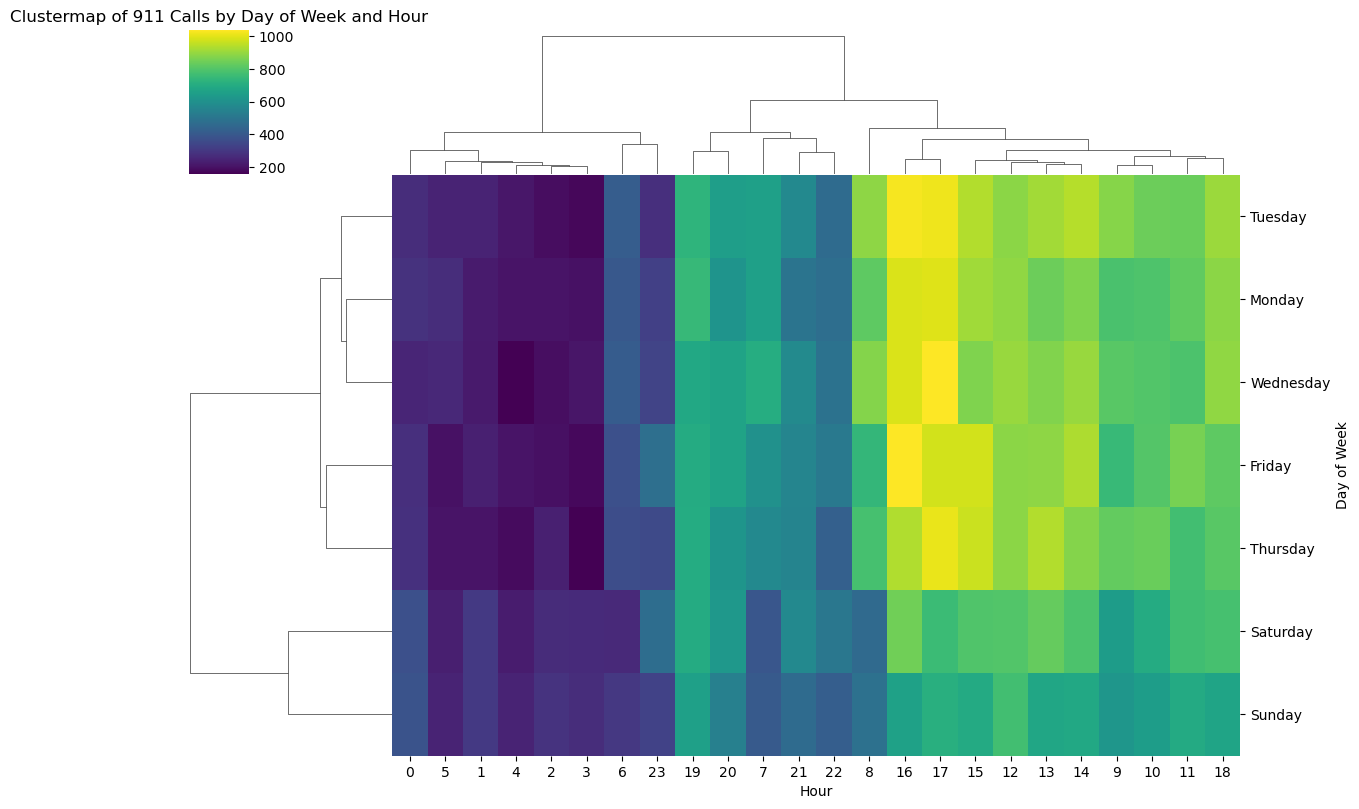

In [117]:
sns.clustermap(heatmap_data,cmap='viridis',figsize=(12,8))

plt.title('Clustermap of 911 Calls by Day of Week and Hour')

plt.show()

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [119]:

df['Month'] = df['timeStamp'].apply(lambda x: x.month)

grouped_by_month = df.groupby(['Day of Week', 'Month']).count()['twp']

heatmap_data_month = grouped_by_month.unstack()

print(heatmap_data_month)

Month          1     2     3     4     5     6     7     8     12
Day of Week                                                      
Friday       1970  1581  1523  1958  1730  1649  2045  1310  1064
Monday       1727  1964  1533  1597  1779  1617  1692  1509  1256
Saturday     2290  1440  1264  1732  1444  1388  1695  1099   978
Sunday       1960  1229  1100  1488  1422  1331  1672  1021   907
Thursday     1584  1596  1900  1601  1590  2065  1646  1227  1265
Tuesday      1973  1753  1884  1430  1917  1673  1668  1612  1233
Wednesday    1699  1902  1888  1517  1538  2054  1715  1295  1260


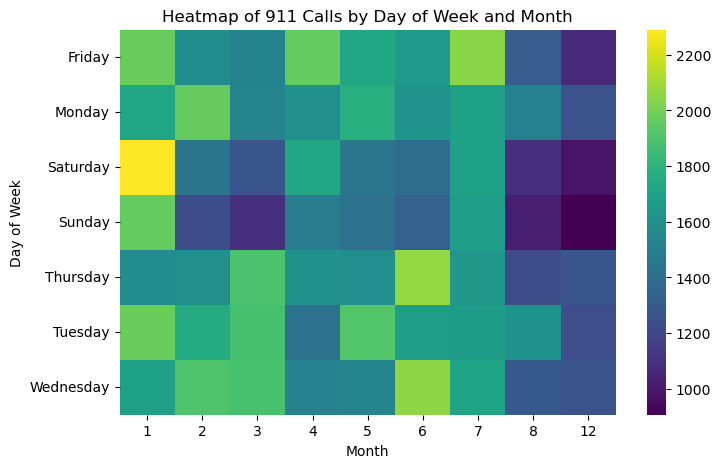

In [122]:
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data_month, cmap='viridis')
plt.title('Heatmap of 911 Calls by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.show()

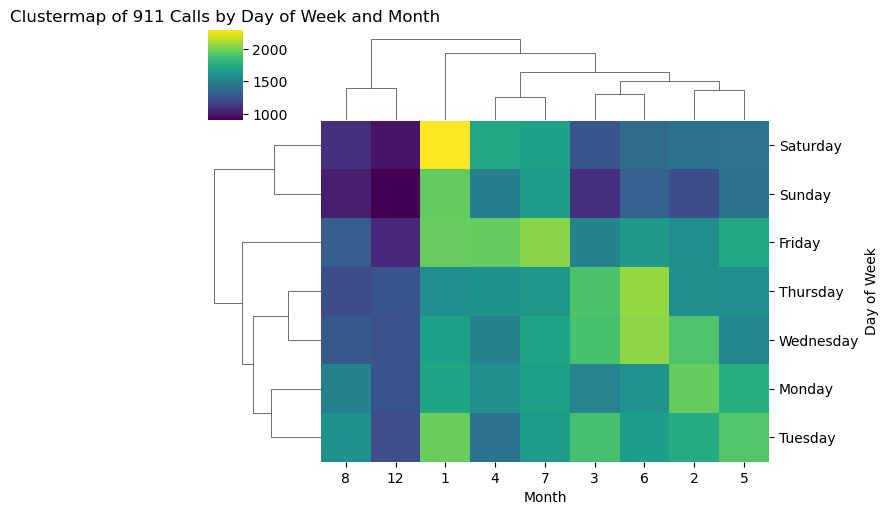

In [126]:
sns.clustermap(heatmap_data_month, cmap='viridis', figsize=(7, 5))
plt.title('Clustermap of 911 Calls by Day of Week and Month')
plt.show()